In [85]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
for x in os.listdir('data'):
    if x.endswith('csv'):
        print(x)

2018SanFranciscoBayWaterQualityData.csv
2019SanFranciscoBayWaterQualityData.csv
2016ver.3.0SanFranciscoBayWaterQualityData.csv
2017ver.3.0SanFranciscoBayWaterQualityData.csv
SanFranciscoBayWaterQualityData1969-2015v3.csv


In [87]:
def read_data(file):
    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = [d if (d.year <= 2020) else d - pd.DateOffset(years=100) for d in df['Date']]    
    df['Station_Number'] = df['Station_Number']
    return df.set_index(['Date', 'Station_Number', 'Depth'])

In [88]:
df_old = read_data('data/SanFranciscoBayWaterQualityData1969-2015v3.csv')
df_2016 = read_data('data/2016ver.3.0SanFranciscoBayWaterQualityData.csv')
df_2017 = read_data('data/2017ver.3.0SanFranciscoBayWaterQualityData.csv')
df_2018 = read_data('data/2018SanFranciscoBayWaterQualityData.csv')
df_2019 = read_data('data/2019SanFranciscoBayWaterQualityData.csv')

In [89]:
df = pd.concat([df_old, df_2016, df_2017, df_2018, df_2019])
df = df.reset_index()

In [90]:
df.head()

,Date,Station_Number,Depth,Discrete_Chlorophyll,Calculated_Chlorophyll,Discrete_Oxygen,Calculated_Oxygen,Discrete_SPM,Calculated_SPM,Extinction_Coefficient,Salinity,Temperature,Nitrite,Nitrate_+_Nitrite,Ammonium,Phosphate,Silicate,Time,Oxygen
0,1969-04-10,4.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,13.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1969-04-10,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,13.1,0.7,NaN,NaN,1.6,236.0,NaN,NaN
2,1969-04-10,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1969-04-10,4.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1969-04-10,5.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


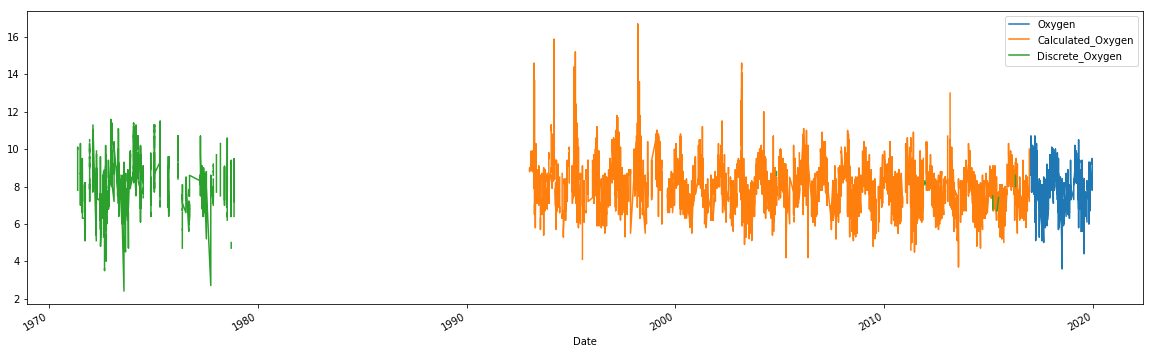

In [91]:
df_plt = df.set_index('Date')

plt.figure(figsize=(20,6))
df_plt['Oxygen'].plot()
df_plt['Calculated_Oxygen'].plot()
df_plt['Discrete_Oxygen'].plot()
plt.legend()
plt.show()

In [92]:
df.loc[df['Oxygen'].isna(), 'Oxygen'] = df.loc[df['Oxygen'].isna(), 'Calculated_Oxygen']
df.loc[df['Oxygen'].isna(), 'Oxygen'] = df.loc[df['Oxygen'].isna(), 'Discrete_Oxygen']
df.drop(['Calculated_Oxygen', 'Discrete_Oxygen'], axis=1, inplace=True)

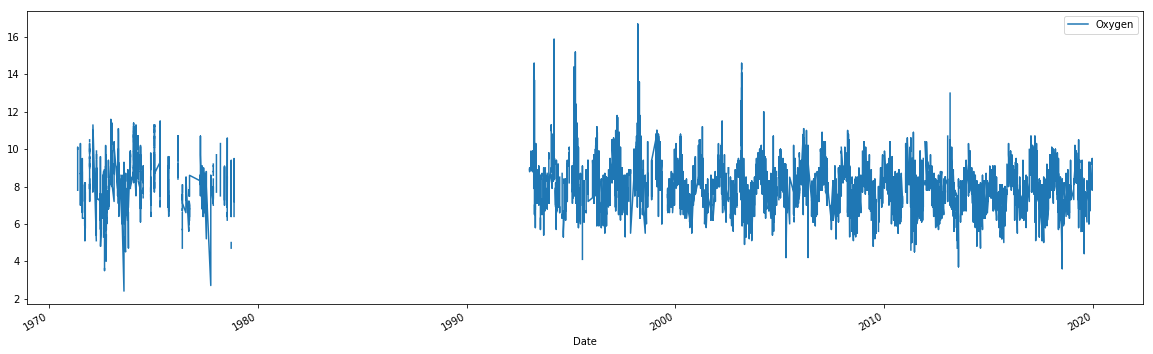

In [93]:
df_plt = df.set_index('Date')

plt.figure(figsize=(20,6))
df_plt['Oxygen'].plot()
plt.legend()
plt.show()

In [94]:
df.head()

,Date,Station_Number,Depth,Discrete_Chlorophyll,Calculated_Chlorophyll,Discrete_SPM,Calculated_SPM,Extinction_Coefficient,Salinity,Temperature,Nitrite,Nitrate_+_Nitrite,Ammonium,Phosphate,Silicate,Time,Oxygen
0,1969-04-10,4.0,0.5,NaN,NaN,NaN,NaN,NaN,0.3,13.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1969-04-10,4.0,2.0,NaN,NaN,NaN,NaN,NaN,0.3,13.1,0.7,NaN,NaN,1.6,236.0,NaN,NaN
2,1969-04-10,4.0,4.0,NaN,NaN,NaN,NaN,NaN,0.3,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1969-04-10,4.0,11.0,NaN,NaN,NaN,NaN,NaN,0.3,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1969-04-10,5.0,0.5,NaN,NaN,NaN,NaN,NaN,0.3,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
df.groupby(['Depth']).count().sort_values('Oxygen', ascending=False).head()

,Date,Station_Number,Discrete_Chlorophyll,Calculated_Chlorophyll,Discrete_SPM,Calculated_SPM,Extinction_Coefficient,Salinity,Temperature,Nitrite,Nitrate_+_Nitrite,Ammonium,Phosphate,Silicate,Time,Oxygen
Depth,,,,,,,,,,,,,,,,
2.0,19565,19565,6875,17306,6114,15546,571,19509,19284,4777,6491,6142,6558,5758,2188,15156
1.0,19833,19833,2145,18237,930,16447,12993,19765,19599,1625,1699,1651,1693,1675,2142,14267
5.0,17818,17818,165,16719,112,14946,1,17790,17660,147,395,364,414,236,2179,14165
4.0,16540,16540,29,16056,24,14220,0,16515,16521,4,4,5,5,3,2186,13772
3.0,16537,16537,20,16005,16,14171,1,16509,16517,0,5,0,4,5,2187,13764


In [96]:
depth = 2.0

In [97]:
df = df[df['Depth'] == depth]

In [98]:
df.head()

,Date,Station_Number,Depth,Discrete_Chlorophyll,Calculated_Chlorophyll,Discrete_SPM,Calculated_SPM,Extinction_Coefficient,Salinity,Temperature,Nitrite,Nitrate_+_Nitrite,Ammonium,Phosphate,Silicate,Time,Oxygen
1,1969-04-10,4.0,2.0,NaN,NaN,NaN,NaN,NaN,0.3,13.1,0.7,NaN,NaN,1.6,236.0,NaN,NaN
5,1969-04-10,5.0,2.0,NaN,NaN,NaN,NaN,NaN,0.2,14.0,NaN,NaN,NaN,5.2,236.0,NaN,NaN
9,1969-04-10,6.0,2.0,NaN,NaN,NaN,NaN,NaN,0.1,13.7,0.7,NaN,NaN,NaN,232.0,NaN,NaN
13,1969-04-10,7.0,2.0,NaN,NaN,NaN,NaN,NaN,0.1,14.4,0.7,NaN,NaN,1.3,230.0,NaN,NaN
18,1969-04-10,8.0,2.0,NaN,NaN,NaN,NaN,NaN,0.1,14.3,0.7,NaN,NaN,1.0,216.0,NaN,NaN


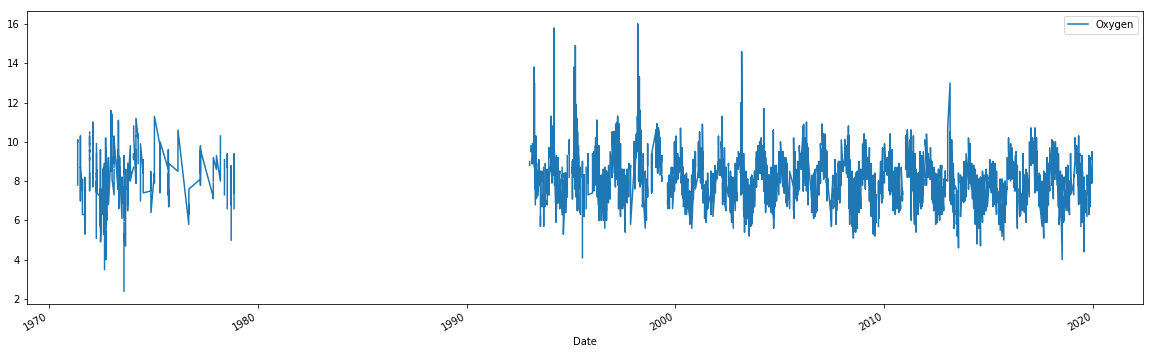

In [99]:
df_plt = df.set_index('Date')

plt.figure(figsize=(20,6))
df_plt['Oxygen'].plot()
plt.legend()
plt.show()

In [100]:
df = df[['Date', 'Station_Number', 'Oxygen']]

In [101]:
df = df.dropna()

In [102]:
df.head()

,Date,Station_Number,Oxygen
1275,1971-05-13,4.0,10.0
1276,1971-05-13,5.0,10.1
1277,1971-05-13,6.0,10.0
1278,1971-05-13,7.0,9.6
1279,1971-05-13,8.0,9.4


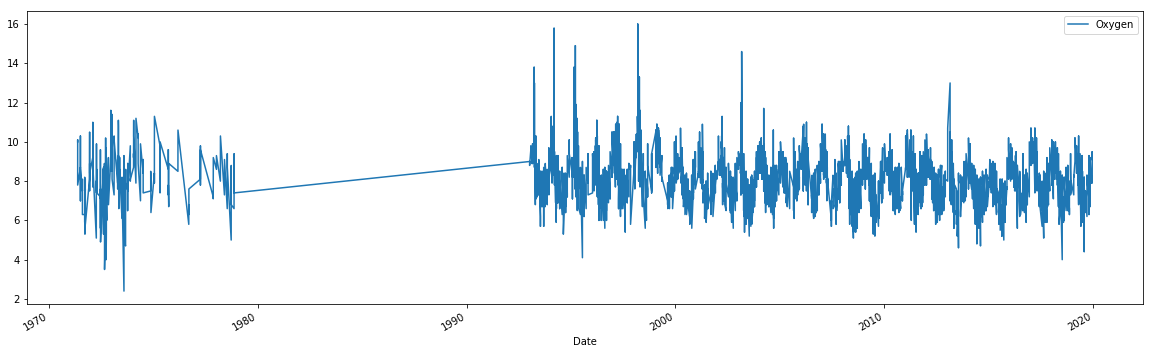

In [103]:
df_plt = df.set_index('Date')

plt.figure(figsize=(20,6))
df_plt['Oxygen'].plot()
plt.legend()
plt.show()

In [104]:
#set(df['Date'])

In [105]:
start_date = datetime.datetime(1995, 1, 1, 0, 0)

In [106]:
df = df[df['Date'] > start_date]

In [107]:
df

,Date,Station_Number,Oxygen
56564,1995-01-18,36.0,8.4
56572,1995-01-18,34.0,8.7
56580,1995-01-18,32.0,8.7
56592,1995-01-18,30.0,8.8
56604,1995-01-18,29.0,8.9
...,...,...,...
241965,2019-12-19,4.0,9.2
241981,2019-12-19,3.0,9.1
241993,2019-12-19,2.0,9.0
242003,2019-12-19,649.0,8.9


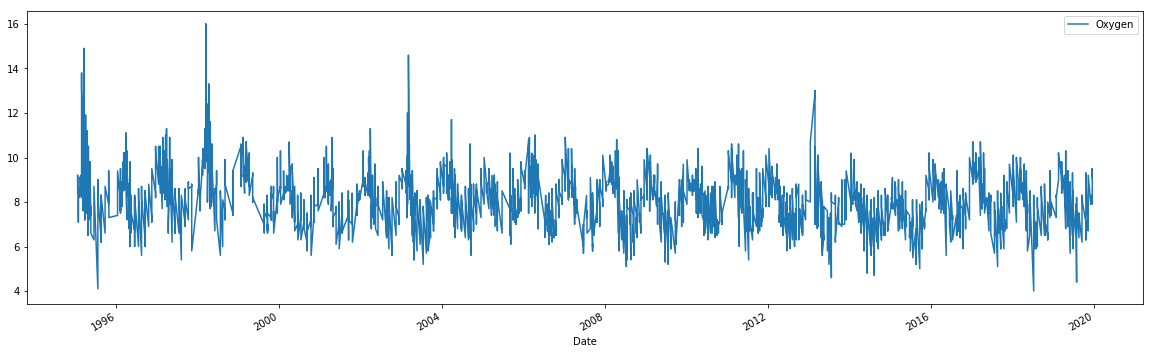

In [108]:
df_plt = df.set_index('Date')

plt.figure(figsize=(20,6))
df_plt['Oxygen'].plot()
plt.legend()
plt.show()

In [109]:
df['month'] = df['Date'].dt.month

In [110]:
df['year'] = df['Date'].dt.year

In [111]:
df.head()

,Date,Station_Number,Oxygen,month,year
56564,1995-01-18,36.0,8.4,1,1995
56572,1995-01-18,34.0,8.7,1,1995
56580,1995-01-18,32.0,8.7,1,1995
56592,1995-01-18,30.0,8.8,1,1995
56604,1995-01-18,29.0,8.9,1,1995


In [112]:
df_month = df.groupby(['year', 'month', 'Station_Number']).mean()
df_month

Oxygen
year month Station_Number        
1995 1     3.0               9.00
           6.0               9.10
           9.0               9.20
           13.0              9.00
           14.0              9.00
...                           ...
2019 12    34.0              8.05
           35.0              8.00
           36.0              7.95
           649.0             8.90
           657.0             9.10

[9413 rows x 1 columns]

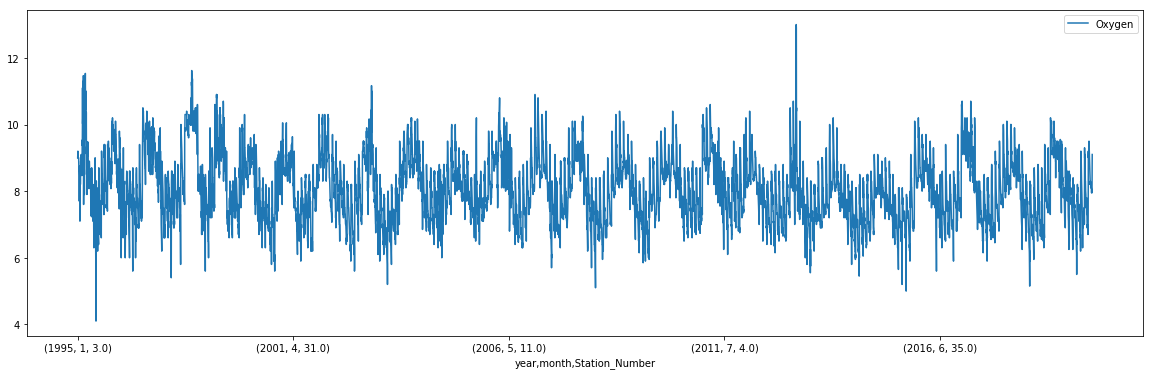

In [113]:
plt.figure(figsize=(20,6))
df_month['Oxygen'].plot()

plt.legend()
plt.show()

In [114]:
coords = {
    657: '38.151667, -121.688333',
    649: '38.060000, -121.800000',
    2: '38.063333, -121.851667',
    3: '38.051667, -121.880000',
    4: '38.048333, -121.935000',
    5: '38.060000, -121.980000',
    6: '38.065000, -122.035000',
    7: '38.048333, -122.096667',
    8: '38.030000, -122.151667',
    9: '38.056667, -122.185000',
    10: '38.060000, -122.208333',
    11: '38.060000, -122.266667',
    12: '38.051667, -122.311667',
    13: '38.028333, -122.370000',
    14: '38.006667, -122.405000',
    15: '37.973333, -122.436667',
    16: '37.916667, -122.446667',
    17: '37.878333, -122.421667',
    18: '37.846667, -122.421667',
    20: '37.820000, -122.393333',
    21: '37.788333, -122.358333',
    22: '37.765000, -122.358333',
    23: '37.728333, -122.336667',
    24: '37.698333, -122.338333',
    25: '37.670000, -122.325000',
    26: '37.636667, -122.313333',
    27: '37.618333, -122.291667',
    28: '37.601667, -122.270000',
    29: '37.580000, -122.245000',
    29.5: '37.568333, -122.218333',
    30: '37.555000, -122.190000',
    31: '37.528333, -122.158333',
    32: '37.518333, -122.133333',
    33: '37.508333, -122.121667',
    34: '37.495000, -122.098333',
    35: '37.480000, -122.078333',
    36: '37.471667, -122.066667',
    662: '38.226667, 121.670000',
    659: '38.178333, 121.666667',
    655: '38.121667, 121.701667',
    654: '38.105000, 121.708333',
    653: '38.105000, 121.720000',
    652: '38.086667, 121.746667',
    651: '38.078333, 121.763333',
    650: '38.071667, 121.775000',
    411: '38.096667, 122.058333',
    407: '38.071667, 122.093333',
    405: '38.048333, 122.123333',
    12.5: '38.040000, 122.315000',
    19: '37.818333, 122.471667',
    28.5: '37.596667, 122.235000'
}

In [116]:
names = {
    657: 'Rio Vista',
    649: 'Sacramento River',
    2: 'Chain Island',
    3: 'Pittsburg',
    4: 'Simmons Point',
    5: 'Middle Ground',
    6: 'Roe Island',
    7: 'Avon Pier',
    8: 'Martinez',
    9: 'Benicia',
    10: 'Crockett',
    11: 'Mare Island',
    12: 'Pinole Shoal',
    13: 'N. of Pinole Point',
    14: '"Echo" Buoy',
    15: 'Point San Pablo',
    16: '"Charlie" Buoy',
    17: 'Raccoon Strait',
    18: 'Point Blunt',
    20: 'Blossom Rock',
    21: 'Bay Bridge',
    22: 'Potrero Point',
    23: 'Hunter\'s Point',
    24: 'Candlestick Point',
    25: 'Oyster Point',
    26: 'San Bruno Shoal',
    27: 'San Francisco Airport',
    28: 'N. of San Mateo Bridge',
    29: 'S. of San Mateo Bridge',
    29.5: 'Steinberger Slough',
    30: 'Redwood Creek',
    31: 'Coyote Hills',
    32: 'Ravenswood Point',
    33: 'Dumbarton Bridge',
    34: 'Newark Slough',
    35: 'Mowry Slough',
    36: 'Calaveras Point',
    662: 'Prospect Isalnd',
    659: 'Old Sac. River',
    655: 'N.of Three Mile Slough',
    654: '',
    653: 'Mid-Decker Island',
    652: 'Towland\'s Landing',
    651: '',
    650: '',
    411: 'Garnet Sill',
    407: 'Reserve Fleet 4',
    405: 'Reserve Fleet 2',
    12.5: 'Pinole Point',
    19: 'Golden Gate',
    28.5: 'Geo Probe'
}

In [117]:
set(df_month.reset_index()['Station_Number'])

{2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 12.5,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 28.5,
 29.0,
 29.5,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 405.0,
 407.0,
 411.0,
 649.0,
 651.0,
 653.0,
 657.0}

In [118]:
df_month = df_month.reset_index()

In [119]:
lats = [float(coords[number].split(', ')[0]) for number in df_month['Station_Number']]
#lats

In [120]:
lngs = [float(coords[number].split(', ')[1]) for number in df_month['Station_Number']]
#lngs

In [121]:
df_month['Lat'] = lats
df_month['Lng'] = lngs

In [123]:
df_month['Station_Name'] = [names[number] for number in df_month['Station_Number']]

In [124]:
df_month['Oxygen'].astype('string').str.len().value_counts()

3     7536
4     1041
17     683
5       77
18      66
6       10
Name: Oxygen, dtype: Int64

In [125]:
df_month['Oxygen'].round(decimals=4).astype('string').str.len().value_counts()

3    7753
4    1192
6     345
5      98
7      25
Name: Oxygen, dtype: Int64

In [126]:
df_month['Oxygen'] = df_month['Oxygen'].round(decimals=4)

In [127]:
df_month['Oxygen']

0       9.00
1       9.10
2       9.20
3       9.00
4       9.00
        ... 
9408    8.05
9409    8.00
9410    7.95
9411    8.90
9412    9.10
Name: Oxygen, Length: 9413, dtype: float64

In [128]:
df_month.to_csv('../oxygen.csv')

In [129]:
df_month.head()

,year,month,Station_Number,Oxygen,Lat,Lng,Station_Name
0,1995,1,3.0,9.0,38.051667,-121.880,Pittsburg
1,1995,1,6.0,9.1,38.065000,-122.035,Roe Island
2,1995,1,9.0,9.2,38.056667,-122.185,Benicia
3,1995,1,13.0,9.0,38.028333,-122.370,N. of Pinole Point
4,1995,1,14.0,9.0,38.006667,-122.405,"""Echo"" Buoy"
